<a href="https://colab.research.google.com/github/San-lab-ship/modelo-predictivo-oro/blob/main/modelo_predictivo_recuperacion_oro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
from google.colab import files

print("Por favor, sube 'gold_recovery_train.csv'")
uploaded_train = files.upload()

print("\nPor favor, sube 'gold_recovery_test.csv'")
uploaded_test = files.upload()

print("\nPor favor, sube 'gold_recovery_full.csv'")
uploaded_full = files.upload()

train_csv_path = 'gold_recovery_train.csv'
test_csv_path = 'gold_recovery_test.csv'
full_csv_path = 'gold_recovery_full.csv'

df_train = pd.read_csv(train_csv_path)
print("Primeras 5 filas del DataFrame de entrenamiento:")
print(df_train.head())
print("\nInformación general del DataFrame de entrenamiento:")
df_train.info()

print("\n" + "="*80 + "\n")

df_test = pd.read_csv(test_csv_path)
print("Primeras 5 filas del DataFrame de prueba:")
print(df_test.head())
print("\nInformación general del DataFrame de prueba:")
df_test.info()

print("\n" + "="*80 + "\n")

df_full = pd.read_csv(full_csv_path)
print("Primeras 5 filas del DataFrame completo:")
print(df_full.head())
print("\nInformación general del DataFrame completo:")
df_full.info()

Por favor, sube 'gold_recovery_train.csv'


Saving gold_recovery_full.csv to gold_recovery_full.csv
Saving gold_recovery_test.csv to gold_recovery_test.csv
Saving gold_recovery_train.csv to gold_recovery_train.csv

Por favor, sube 'gold_recovery_test.csv'


Saving gold_recovery_test.csv to gold_recovery_test (1).csv

Por favor, sube 'gold_recovery_full.csv'


Saving gold_recovery_full.csv to gold_recovery_full (1).csv
Primeras 5 filas del DataFrame de entrenamiento:
                  date  final.output.concentrate_ag  \
0  2016-01-15 00:00:00                     6.055403   
1  2016-01-15 01:00:00                     6.029369   
2  2016-01-15 02:00:00                     6.055926   
3  2016-01-15 03:00:00                     6.047977   
4  2016-01-15 04:00:00                     6.148599   

   final.output.concentrate_pb  final.output.concentrate_sol  \
0                     9.889648                      5.507324   
1                     9.968944                      5.257781   
2                    10.213995                      5.383759   
3                     9.977019                      4.858634   
4                    10.142511                      4.939416   

   final.output.concentrate_au  final.output.recovery  final.output.tail_ag  \
0                    42.192020              70.541216             10.411962   
1                

In [7]:
# Cálculo de la recuperación

import pandas as pd
from sklearn.metrics import mean_absolute_error
import numpy as np

# Rutas correctas para archivos subidos directamente a Colab
train_path = 'gold_recovery_train.csv'
# test_path = 'gold_recovery_test.csv'
# full_path = 'gold_recovery_full.csv'

df_train = pd.read_csv(train_path)

C = df_train['rougher.output.concentrate_au']
F = df_train['rougher.input.feed_au']
T = df_train['rougher.output.tail_au']

calculated_recovery = (C * (F - T)) / (F * (C - T)) * 100
calculated_recovery = calculated_recovery.replace([np.inf, -np.inf], np.nan)

actual_recovery = df_train['rougher.output.recovery']

comparison_df = pd.DataFrame({'calculated': calculated_recovery, 'actual': actual_recovery}).dropna()

mae = mean_absolute_error(comparison_df['actual'], comparison_df['calculated'])

print(f"MAE de la recuperación rougher.output.recovery: {mae}")

MAE de la recuperación rougher.output.recovery: 9.303415616264301e-15


In [8]:
import pandas as pd

# Las rutas se asumen como el nombre del archivo si se subieron directamente a Colab
train_csv_path = 'gold_recovery_train.csv'
test_csv_path = 'gold_recovery_test.csv'
full_csv_path = 'gold_recovery_full.csv'

df_train = pd.read_csv(train_csv_path)
df_test = pd.read_csv(test_csv_path)
df_full = pd.read_csv(full_csv_path)

cols_full = set(df_full.columns)
cols_test = set(df_test.columns)

features_not_in_test = list(cols_full - cols_test)
features_not_in_test.sort()

print("Características no disponibles en el conjunto de prueba (df_test):")
for feature in features_not_in_test:
    if feature in df_full.columns:
        print(f"- {feature}: {df_full[feature].dtype}")
    else:
        print(f"- {feature}: Tipo de dato desconocido (no encontrada en df_full)")

print(f"\nNúmero total de características no disponibles en el conjunto de prueba: {len(features_not_in_test)}")

Características no disponibles en el conjunto de prueba (df_test):
- final.output.concentrate_ag: float64
- final.output.concentrate_au: float64
- final.output.concentrate_pb: float64
- final.output.concentrate_sol: float64
- final.output.recovery: float64
- final.output.tail_ag: float64
- final.output.tail_au: float64
- final.output.tail_pb: float64
- final.output.tail_sol: float64
- primary_cleaner.output.concentrate_ag: float64
- primary_cleaner.output.concentrate_au: float64
- primary_cleaner.output.concentrate_pb: float64
- primary_cleaner.output.concentrate_sol: float64
- primary_cleaner.output.tail_ag: float64
- primary_cleaner.output.tail_au: float64
- primary_cleaner.output.tail_pb: float64
- primary_cleaner.output.tail_sol: float64
- rougher.calculation.au_pb_ratio: float64
- rougher.calculation.floatbank10_sulfate_to_au_feed: float64
- rougher.calculation.floatbank11_sulfate_to_au_feed: float64
- rougher.calculation.sulfate_to_au_concentrate: float64
- rougher.output.concent

In [9]:
import pandas as pd

train_csv_path = 'gold_recovery_train.csv'
test_csv_path = 'gold_recovery_test.csv'
full_csv_path = 'gold_recovery_full.csv'

df_train_raw = pd.read_csv(train_csv_path)
df_test_raw = pd.read_csv(test_csv_path)
df_full_raw = pd.read_csv(full_csv_path)

def preprocess_dataframe(df_raw):
    df_processed = df_raw.copy()
    if 'date' in df_processed.columns:
        df_processed = df_processed.set_index(pd.to_datetime(df_processed['date']))
        df_processed = df_processed.drop('date', axis=1)
    else:
        df_processed.index = pd.to_datetime(df_processed.index)
    df_processed = df_processed.sort_index().ffill().bfill()
    return df_processed

print("Iniciando preprocesamiento de datos...")

df_train = preprocess_dataframe(df_train_raw)
df_test = preprocess_dataframe(df_test_raw)
df_full = preprocess_dataframe(df_full_raw)

dataframes_to_print = {'entrenamiento': df_train,'prueba': df_test,'completo': df_full}

for name, df_to_print in dataframes_to_print.items():
    print(f"\n--- DataFrame de {name} preprocesado (primeras 5 filas) ---")
    print(df_to_print.head())
    print(f"\nValores nulos después del preprocesamiento en df_{name}:")
    print(df_to_print.isnull().sum().sum())

print("\nPreprocesamiento de datos completado.")

Iniciando preprocesamiento de datos...

--- DataFrame de entrenamiento preprocesado (primeras 5 filas) ---
                     final.output.concentrate_ag  final.output.concentrate_pb  \
date                                                                            
2016-01-15 00:00:00                     6.055403                     9.889648   
2016-01-15 01:00:00                     6.029369                     9.968944   
2016-01-15 02:00:00                     6.055926                    10.213995   
2016-01-15 03:00:00                     6.047977                     9.977019   
2016-01-15 04:00:00                     6.148599                    10.142511   

                     final.output.concentrate_sol  \
date                                                
2016-01-15 00:00:00                      5.507324   
2016-01-15 01:00:00                      5.257781   
2016-01-15 02:00:00                      5.383759   
2016-01-15 03:00:00                      4.858634   
2016-01

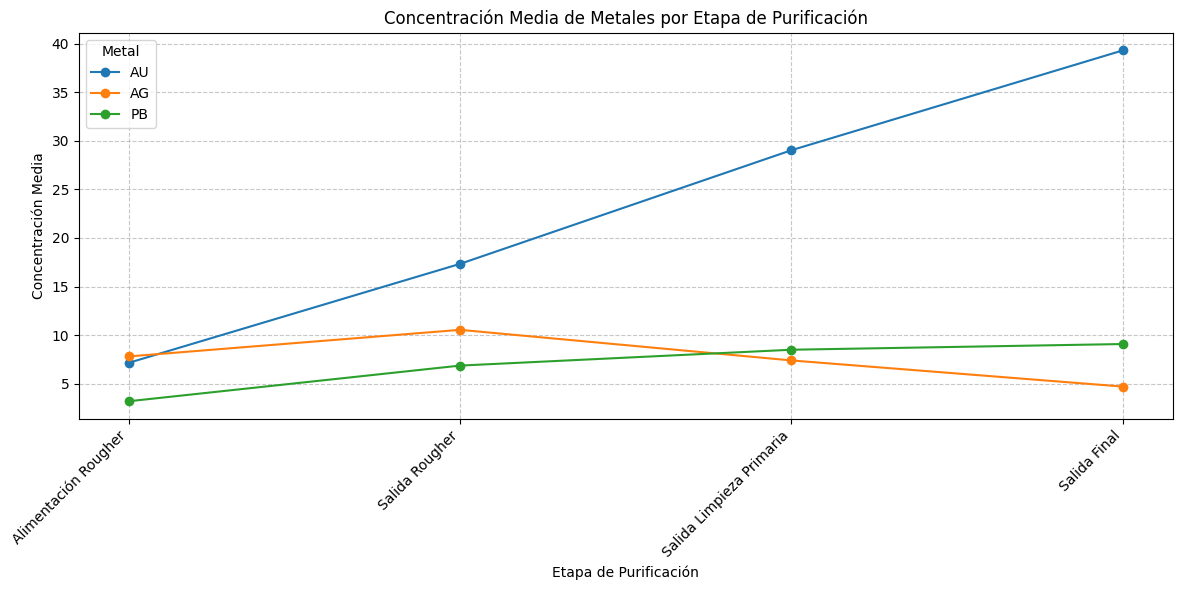

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Rutas de archivo (asumiendo que ya se subieron a Colab)
train_csv_path = 'gold_recovery_train.csv'
df_train = pd.read_csv(train_csv_path)

# Aseguramos que df_train esté preprocesado como se hizo en la etapa anterior
# Esto es crucial para manejar posibles valores nulos o el índice de fecha si se usa.
# Replicamos el preprocesamiento básico para este script si no se corre secuencialmente
def preprocess_dataframe_for_analysis(df_raw):
    df_processed = df_raw.copy()
    if 'date' in df_processed.columns:
        df_processed = df_processed.set_index(pd.to_datetime(df_processed['date']))
        df_processed = df_processed.drop('date', axis=1)
    df_processed = df_processed.sort_index().ffill().bfill() # ffill y bfill para manejar nulos
    return df_processed

df_train = preprocess_dataframe_for_analysis(df_train)


stages = ['rougher.input.feed_',
          'rougher.output.concentrate_',
          'primary_cleaner.output.concentrate_',
          'final.output.concentrate_']
metals = ['au', 'ag', 'pb']

concentrations = {}
for metal in metals:
    metal_concentrations = []
    for stage_prefix in stages:
        col_name = stage_prefix + metal
        if col_name in df_train.columns:
            metal_concentrations.append(df_train[col_name].mean())
        else:
            metal_concentrations.append(np.nan)
    concentrations[metal.upper()] = metal_concentrations

concentration_df = pd.DataFrame(concentrations, index=[
    'Alimentación Rougher',
    'Salida Rougher',
    'Salida Limpieza Primaria',
    'Salida Final'])

spanish_stage_labels = concentration_df.index.tolist()

plt.figure(figsize=(12, 6))
concentration_df.plot(ax=plt.gca(), marker='o')

plt.title('Concentración Media de Metales por Etapa de Purificación')
plt.xlabel('Etapa de Purificación')
plt.ylabel('Concentración Media')
plt.grid(True, linestyle='--', alpha=0.7)

plt.xticks(ticks=range(len(spanish_stage_labels)), labels=spanish_stage_labels, rotation=45, ha='right')

plt.tight_layout()
plt.legend(title='Metal')
plt.show()

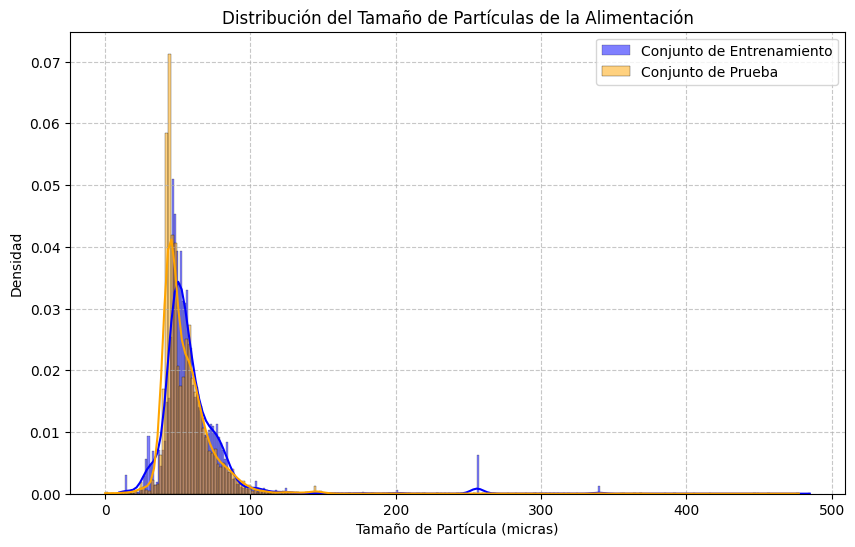

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Rutas de archivo (asumiendo que ya se subieron a Colab)
train_csv_path = 'gold_recovery_train.csv'
test_csv_path = 'gold_recovery_test.csv'

df_train = pd.read_csv(train_csv_path)
df_test = pd.read_csv(test_csv_path)

# Aseguramos que los DataFrames estén preprocesados para este análisis,
# replicando la función de preprocesamiento si este script se ejecuta solo.
def preprocess_dataframe_for_analysis(df_raw):
    df_processed = df_raw.copy()
    if 'date' in df_processed.columns:
        df_processed = df_processed.set_index(pd.to_datetime(df_processed['date']))
        df_processed = df_processed.drop('date', axis=1)
    df_processed = df_processed.sort_index().ffill().bfill()
    return df_processed

df_train = preprocess_dataframe_for_analysis(df_train)
df_test = preprocess_dataframe_for_analysis(df_test)


# Extraer las columnas de tamaño de partículas
# Asegúrate de que los nombres de las columnas existan en tus DataFrames
feed_size_train = df_train['rougher.input.feed_size']
feed_size_test = df_test['rougher.input.feed_size']

plt.figure(figsize=(10, 6))
sns.histplot(feed_size_train, kde=True, color='blue', label='Conjunto de Entrenamiento', alpha=0.5, stat='density')
sns.histplot(feed_size_test, kde=True, color='orange', label='Conjunto de Prueba', alpha=0.5, stat='density')

plt.title('Distribución del Tamaño de Partículas de la Alimentación')
plt.xlabel('Tamaño de Partícula (micras)')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Iniciando análisis y eliminación de anomalías en concentraciones totales


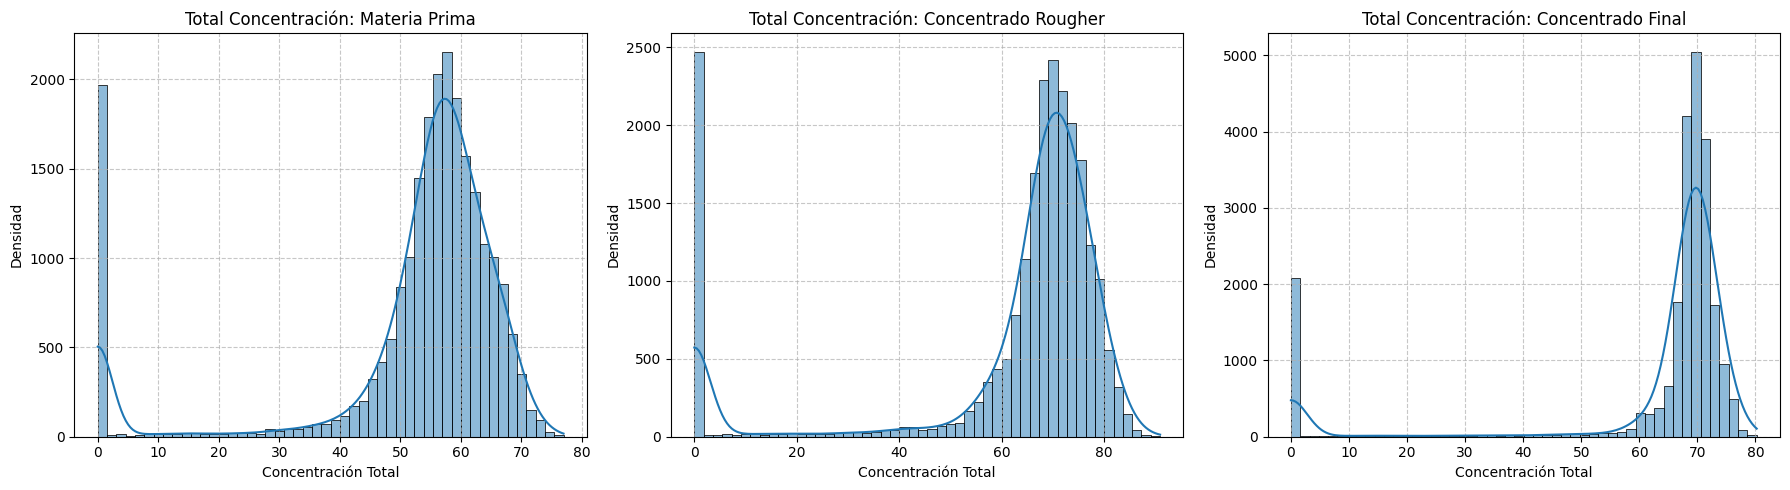


Número de filas con concentraciones totales anómalas (cercanas a cero) identificadas: 2806
Filas eliminadas de df_train: 2241
Filas eliminadas de df_test: 565

Anomalías de concentración total eliminadas de los conjuntos de entrenamiento y prueba.
Los DataFrames df_train y df_test están limpios para el siguiente paso.


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Rutas de archivo (asumiendo que ya se subieron a Colab)
train_csv_path = 'gold_recovery_train.csv'
test_csv_path = 'gold_recovery_test.csv'
full_csv_path = 'gold_recovery_full.csv'

# Carga de los DataFrames
df_train = pd.read_csv(train_csv_path)
df_test = pd.read_csv(test_csv_path)
df_full = pd.read_csv(full_csv_path)

# Función de preprocesamiento para asegurar consistencia
def preprocess_dataframe_for_analysis(df_raw):
    df_processed = df_raw.copy()
    if 'date' in df_processed.columns:
        df_processed = df_processed.set_index(pd.to_datetime(df_processed['date']))
        df_processed = df_processed.drop('date', axis=1)
    else:
        df_processed.index = pd.to_datetime(df_processed.index)
    df_processed = df_processed.sort_index().ffill().bfill()
    return df_processed

df_train = preprocess_dataframe_for_analysis(df_train)
df_test = preprocess_dataframe_for_analysis(df_test)
df_full = preprocess_dataframe_for_analysis(df_full)

print("Iniciando análisis y eliminación de anomalías en concentraciones totales")

stages_and_metals = {
    'rougher.input': ['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol'],
    'rougher.output': ['rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol'],
    'final.output': ['final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol']}

for stage, cols in stages_and_metals.items():
    df_full[f'{stage}.total_concentration'] = df_full[cols].sum(axis=1)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
plot_titles = ['Materia Prima', 'Concentrado Rougher', 'Concentrado Final']

for i, stage in enumerate(stages_and_metals.keys()):
    sns.histplot(df_full[f'{stage}.total_concentration'], kde=True, bins=50, ax=axes[i])
    axes[i].set_title(f'Total Concentración: {plot_titles[i]}')
    axes[i].set_xlabel('Concentración Total')
    axes[i].set_ylabel('Densidad')
    axes[i].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

threshold = 0.1
anomalous_indices = df_full[
    (df_full['rougher.input.total_concentration'] < threshold) |
    (df_full['rougher.output.total_concentration'] < threshold) |
    (df_full['final.output.total_concentration'] < threshold)].index

print(f"\nNúmero de filas con concentraciones totales anómalas (cercanas a cero) identificadas: {len(anomalous_indices)}")

rows_before_drop_train = len(df_train)
rows_before_drop_test = len(df_test)

df_train = df_train.drop(anomalous_indices, errors='ignore')
df_test = df_test.drop(anomalous_indices, errors='ignore')

print(f"Filas eliminadas de df_train: {rows_before_drop_train - len(df_train)}")
print(f"Filas eliminadas de df_test: {rows_before_drop_test - len(df_test)}")

print("\nAnomalías de concentración total eliminadas de los conjuntos de entrenamiento y prueba.")
print("Los DataFrames df_train y df_test están limpios para el siguiente paso.")

In [13]:
import numpy as np

def calculate_smape_single(actual, predicted):
    """
    Calcula el sMAPE (Symmetric Mean Absolute Percentage Error) para un conjunto de valores.
    Parámetros:
    actual (array-like): Valores reales.
    predicted (array-like): Valores predichos.
    Retorna:
    float: El valor de sMAPE para el conjunto dado.
    """
    actual = np.array(actual)
    predicted = np.array(predicted)

    denominator = (np.abs(actual) + np.abs(predicted)) / 2
    numerator = np.abs(predicted - actual)

    smape_terms = np.zeros_like(actual, dtype=float)
    non_zero_denominator_mask = denominator != 0

    smape_terms[non_zero_denominator_mask] = (numerator[non_zero_denominator_mask] / denominator[non_zero_denominator_mask])

    smape_value = np.mean(smape_terms) * 100

    return smape_value

def calculate_final_smape(smape_rougher, smape_final):
    """
    Calcula el sMAPE final ponderado según la fórmula del proyecto.
    Parámetros:
    smape_rougher (float): El valor de sMAPE para la etapa rougher.
    smape_final (float): El valor de sMAPE para la etapa final.
    Retorna:
    float: El valor de sMAPE final ponderado.
    """
    return 0.25 * smape_rougher + 0.75 * smape_final

print("--- Demostración del cálculo de sMAPE ---")

actual_rougher = np.array([70.0, 72.5, 68.0, 75.0, 0.0])
predicted_rougher = np.array([71.0, 70.0, 69.5, 73.0, 0.0])

actual_final = np.array([85.0, 83.0, 88.0, 80.0, 0.0])
predicted_final = np.array([84.5, 84.0, 87.0, 81.5, 0.0])

smape_rougher_result = calculate_smape_single(actual_rougher, predicted_rougher)
smape_final_result = calculate_smape_single(actual_final, predicted_final)

print(f"sMAPE para la etapa Rougher: {smape_rougher_result:.2f}%")
print(f"sMAPE para la etapa Final: {smape_final_result:.2f}%")


final_smape_result = calculate_final_smape(smape_rougher_result, smape_final_result)

print(f"\nsMAPE Final Ponderado: {final_smape_result:.2f}%")

--- Demostración del cálculo de sMAPE ---
sMAPE para la etapa Rougher: 1.96%
sMAPE para la etapa Final: 0.96%

sMAPE Final Ponderado: 1.21%


In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Rutas de archivo (asumiendo que ya se subieron a Colab)
train_csv_path = 'gold_recovery_train.csv'
test_csv_path = 'gold_recovery_test.csv'
full_csv_path = 'gold_recovery_full.csv'

# Carga de los DataFrames
df_train_raw = pd.read_csv(train_csv_path)
df_test_raw = pd.read_csv(test_csv_path)
df_full_raw = pd.read_csv(full_csv_path)

# Función de preprocesamiento para asegurar consistencia
def preprocess_dataframe(df_raw):
    df_processed = df_raw.copy()
    if 'date' in df_processed.columns:
        df_processed = df_processed.set_index(pd.to_datetime(df_processed['date']))
        df_processed = df_processed.drop('date', axis=1)
    else:
        df_processed.index = pd.to_datetime(df_processed.index)
    df_processed = df_processed.sort_index().ffill().bfill()
    return df_processed

df_train = preprocess_dataframe(df_train_raw)
df_test = preprocess_dataframe(df_test_raw)
df_full = preprocess_dataframe(df_full_raw)

# Secciones de cálculo de sMAPE (se mantienen como las definiste)
def calculate_smape_single(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    predicted[predicted < 0] = 0
    denominator = (np.abs(actual) + np.abs(predicted)) / 2
    numerator = np.abs(predicted - actual)
    smape_terms = np.zeros_like(actual, dtype=float)
    non_zero_mask = denominator != 0
    smape_terms[non_zero_mask] = numerator[non_zero_mask] / denominator[non_zero_mask]
    return np.mean(smape_terms) * 100

def calculate_final_smape(smape_rougher, smape_final):
    return 0.25 * smape_rougher + 0.75 * smape_final

# Definición de targets y características a excluir
target_rougher, target_final = 'rougher.output.recovery', 'final.output.recovery'
features_to_exclude = {target_rougher, target_final, 'date'}

# Identificar características comunes entre train y test, excluyendo targets y 'date'
# Aseguramos que 'date' se excluye aunque ya sea el índice.
common_features = sorted(list((set(df_train.columns) & set(df_test.columns)) - features_to_exclude))

# Preparar los DataFrames para el entrenamiento y prueba
df_train_cleaned = df_train[common_features + [target_rougher, target_final]].dropna()
X_train = df_train_cleaned[common_features]
y_train_rougher = df_train_cleaned[target_rougher]
y_train_final = df_train_cleaned[target_final]

# Para df_test, necesitamos fusionar los targets de df_full usando los índices de df_test.
# Es importante que los índices de df_test y df_full coincidan en las fechas.
# Aseguramos que solo las columnas presentes en X_test y los targets sean consideradas para dropna.
df_test_merged = df_test[common_features].merge(
    df_full.loc[df_test.index, [target_rougher, target_final]], left_index=True, right_index=True).dropna()

X_test = df_test_merged[common_features]
y_test_rougher_actual = df_test_merged[target_rougher]
y_test_final_actual = df_test_merged[target_final]

# Configuración de los modelos
models_config = {
    'Regresión Lineal': LinearRegression,
    'Árbol de Decisión': lambda: DecisionTreeRegressor(random_state=42, max_depth=8),
    'Bosque Aleatorio': lambda: RandomForestRegressor(random_state=42, n_estimators=20, max_depth=5)
}

best_model_name, best_smape_cv_score, best_model_class = None, float('inf'), None

print("Evaluación de Modelos con Validación Cruzada")
for name, model_init_func in models_config.items():
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = []
    for train_idx, val_idx in kf.split(X_train):
        model_r, model_f = model_init_func(), model_init_func()
        model_r.fit(X_train.iloc[train_idx], y_train_rougher.iloc[train_idx])
        model_f.fit(X_train.iloc[train_idx], y_train_final.iloc[train_idx])

        smape_r = calculate_smape_single(y_train_rougher.iloc[val_idx], model_r.predict(X_train.iloc[val_idx]))
        smape_f = calculate_smape_single(y_train_final.iloc[val_idx], model_f.predict(X_train.iloc[val_idx]))
        cv_scores.append(calculate_final_smape(smape_r, smape_f))

    mean_smape_cv = np.mean(cv_scores)
    print(f"{name}: sMAPE CV promedio: {mean_smape_cv:.4f}")

    if mean_smape_cv < best_smape_cv_score:
        best_smape_cv_score, best_model_name, best_model_class = mean_smape_cv, name, model_init_func

print(f"\nMejor Modelo: {best_model_name} (sMAPE CV: {best_smape_cv_score:.4f})")

print("\nResultados en Conjunto de Prueba")
model_rougher_final, model_final_final = best_model_class(), best_model_class()
model_rougher_final.fit(X_train, y_train_rougher)
model_final_final.fit(X_train, y_train_final)

smape_rougher_test = calculate_smape_single(y_test_rougher_actual, model_rougher_final.predict(X_test))
smape_final_test = calculate_smape_single(y_test_final_actual, model_final_final.predict(X_test))
final_smape_on_test = calculate_final_smape(smape_rougher_test, smape_final_test)

print(f"sMAPE Rougher (Prueba): {smape_rougher_test:.4f}%")
print(f"sMAPE Final (Prueba): {smape_final_test:.4f}%")
print(f"sMAPE Final Ponderado (Prueba): {final_smape_on_test:.4f}%")

Evaluación de Modelos con Validación Cruzada
Regresión Lineal: sMAPE CV promedio: 13.3409
Árbol de Decisión: sMAPE CV promedio: 10.3641
Bosque Aleatorio: sMAPE CV promedio: 11.9298

Mejor Modelo: Árbol de Decisión (sMAPE CV: 10.3641)

Resultados en Conjunto de Prueba
sMAPE Rougher (Prueba): 13.8283%
sMAPE Final (Prueba): 16.6841%
sMAPE Final Ponderado (Prueba): 15.9701%
